<a href="https://colab.research.google.com/github/xBrymer/COVID19-AI-CT-Scan-Detection/blob/master/preprocessing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import shutil
import os

from os.path import join
from zipfile import ZipFile

from skimage.io import imread
from skimage import exposure, color, img_as_ubyte, img_as_uint
from skimage.transform import resize

import cv2
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import random

import PIL.Image as pil_image
import io
import numpy as np

from skimage import exposure

# Preprocessing the training dataset

In [5]:
ds_dir = '/content/datasets'

training_dir = join(ds_dir, 'training')
training_covid_dir = join(ds_dir, 'training', 'covid')
training_normal_dir = join(ds_dir, 'training', 'normal')

testing_dir = join(ds_dir, 'testing')
testing_covid_dir = join(ds_dir, 'testing', 'covid')
testing_normal_dir = join(ds_dir, 'testing', 'normal')

validation_dir = join(ds_dir, 'validation')
validation_covid_dir = join(ds_dir, 'validation', 'covid')
validation_normal_dir = join(ds_dir, 'validation', 'normal')

In [7]:
dirs = [ds_dir, training_dir, training_covid_dir, training_normal_dir,
       testing_dir, testing_covid_dir, testing_normal_dir,
       validation_dir, validation_covid_dir, validation_normal_dir]

In [8]:
for dir in dirs:
  try:
    os.mkdir(dir)
  except:
    pass

In [12]:
raw_dir = '/content/raw'
ext_dir = '/content/raw/extracted'
temp_dir = '/content/raw/temp'
temp_covid_dir = '/content/raw/temp/covid'
temp_normal_dir = '/content/raw/temp/normal'
trans_dir = '/content/raw/transcoded'
preprocess_dir = '/content/raw/preprocessed'


temp_dirs = [raw_dir, ext_dir, temp_dir, temp_covid_dir, temp_normal_dir, trans_dir, 
             preprocess_dir]

for dir in temp_dirs:
  try:
    os.mkdir(dir)
  except:
    pass


In [13]:
path = '/content/drive/My Drive/External Datasets/COVID19-Project/COVID19-CT-SCANS- Train&Validation.zip'
f = ZipFile(path, 'r')
f.extractall(ext_dir)

In [16]:
for image in tqdm(os.listdir(ext_dir)):
  if 'covid' in image:
      shutil.move(join(ext_dir, image), join(temp_covid_dir, image))
  if 'normal' in image:
      shutil.move(join(ext_dir, image), join(temp_normal_dir, image))

In [18]:
difference = len(os.listdir(temp_normal_dir)) - len(os.listdir(temp_covid_dir))
print(difference)

7494


In [20]:
for i in tqdm(range(difference)):
  image = random.choice(os.listdir(temp_normal_dir))

  os.remove(join(temp_normal_dir, image))

In [21]:
difference_now = len(os.listdir(temp_normal_dir)) - len(os.listdir(temp_covid_dir))
print(difference_now)

0


In [23]:
def transcode(source, destination):
  for image in tqdm(os.listdir(source)):
      path = join(source, image)
      save_path= join(destination, image)
                      
      with open(path, 'rb') as f:
          tif = pil_image.open(io.BytesIO(f.read()))
      array=np.array(tif)
      max_val=np.amax(array)
      normalized=(array/max_val)
      im = pil_image.fromarray(normalized)
      os.remove(path)
      im.save(save_path) 

In [26]:
transcode(temp_normal_dir, trans_dir)
transcode(temp_covid_dir, trans_dir)

In [27]:
for image in tqdm(os.listdir(trans_dir)):
  if 'covid' in image:
      shutil.move(join(trans_dir, image), join(temp_covid_dir, image))
  if 'normal' in image:
      shutil.move(join(trans_dir, image), join(temp_normal_dir, image))

In [29]:
def preprocess(source, destination):
    for image in tqdm(os.listdir(source)):
        
        img_path = join(source, image)
        save_path = join(destination, image.split('.')[0] + '.jpg')
        
        img = imread(img_path)
        img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
        plt.imsave(save_path, img_adapteq, cmap='gray')
    
    return

In [30]:
preprocess(temp_covid_dir, training_covid_dir)
preprocess(temp_normal_dir, training_normal_dir)

/content/datasets/training/covid


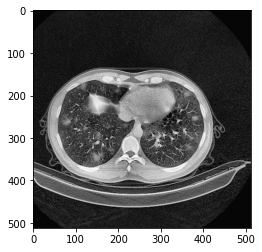

In [38]:
folder = join('/content/datasets/training', random.choice(os.listdir('/content/datasets/training')))
print(folder)
image = random.choice(os.listdir(folder))

img_path = join(folder, image)
img = imread(img_path)
plt.imshow(img, cmap = 'gray')

In [36]:
for image in tqdm(os.listdir(temp_covid_dir)):
  os.remove(join(temp_covid_dir, image))

for image in tqdm(os.listdir(temp_normal_dir)):
  os.remove(join(temp_normal_dir, image))

In [42]:
# Checking if the temp. directories are empty

for dir in temp_dirs:
  print(dir, len(dir), os.listdir(dir))

/content/raw 12 ['preprocessed', 'transcoded', 'extracted', 'temp']
/content/raw/extracted 22 []
/content/raw/temp 17 ['normal', 'covid']
/content/raw/temp/covid 23 []
/content/raw/temp/normal 24 []
/content/raw/transcoded 23 []
/content/raw/preprocessed 25 []


# Preprocessing the testing dataset

In [44]:
path = '/content/drive/My Drive/External Datasets/Kaggle/sarscov2-ctscan-dataset.zip'
f = ZipFile(path, 'r')
f.extractall(ext_dir)

In [45]:
preprocess('/content/raw/extracted/COVID', testing_covid_dir)
preprocess('/content/raw/extracted/non-COVID', testing_normal_dir)

/content/datasets/testing/normal


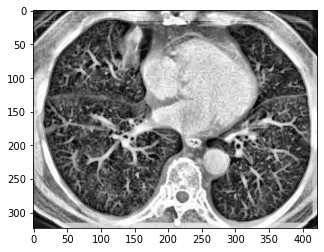

In [56]:
folder = join(testing_dir, random.choice(os.listdir(testing_dir)))
print(folder)
image = random.choice(os.listdir(folder))

img_path = join(folder, image)
img = imread(img_path)
plt.imshow(img, cmap = 'gray')

In [58]:
for File in os.listdir(ext_dir):
  shutil.rmtree(join(ext_dir,File))

# Preprocessing the validation dataset

In [ ]:
!wget https://github.com/UCSD-AI4H/COVID-CT/raw/master/Images-processed/CT_COVID.zip
!wget https://github.com/UCSD-AI4H/COVID-CT/raw/master/Images-processed/CT_NonCOVID.zip

In [61]:
path = '/content/CT_COVID.zip'
f = ZipFile(path, 'r')
f.extractall(ext_dir)

path = '/content/CT_NonCOVID.zip'
f = ZipFile(path, 'r')
f.extractall(ext_dir)

In [62]:
shutil.rmtree('/content/raw/extracted/__MACOSX')

In [63]:
preprocess('/content/raw/extracted/CT_COVID', validation_covid_dir)
preprocess('/content/raw/extracted/CT_NonCOVID', validation_normal_dir)

/content/datasets/testing/normal


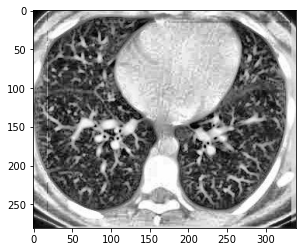

In [68]:
folder = join(testing_dir, random.choice(os.listdir(validation_dir)))
print(folder)
image = random.choice(os.listdir(folder))

img_path = join(folder, image)
img = imread(img_path)
plt.imshow(img, cmap = 'gray')

In [69]:
shutil.make_archive(base_name= 'dataset', format = 'zip', root_dir= ds_dir, base_dir=ds_dir, verbose =1)

'/content/dataset.zip'

In [ ]:
path = '/content/drive/My Drive/External Datasets/COVID19-Project/dataset.zip'
f = ZipFile(path, 'r')
f.printdir()